### Почувствуем дисперсию.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

  * через кривые обучения 
  * через структуру дерева  

In [1]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [3]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring="f1"):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    
    print(train_scores_mean)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [7]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
rc = RidgeClassifier(random_state=42, )
dtc = DecisionTreeClassifier(random_state=42)

dtc_2 = DecisionTreeClassifier(random_state=42, max_depth=4)


In [10]:
from sklearn.datasets import load_breast_cancer 
the_data = load_breast_cancer()    

# 0 -- "доброкачественный" 
# 1 -- "злокачественный" 
relabeled_target = 1 - the_data["target"] 

from sklearn.model_selection import train_test_split 
X = the_data["data"] 
y = relabeled_target 


[1. 1. 1. 1. 1.]
[1.         0.9990086  0.99477778 0.99069405 0.99250732]
[0.99601914 0.99105994 0.98959586 0.99111727 0.99367073]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

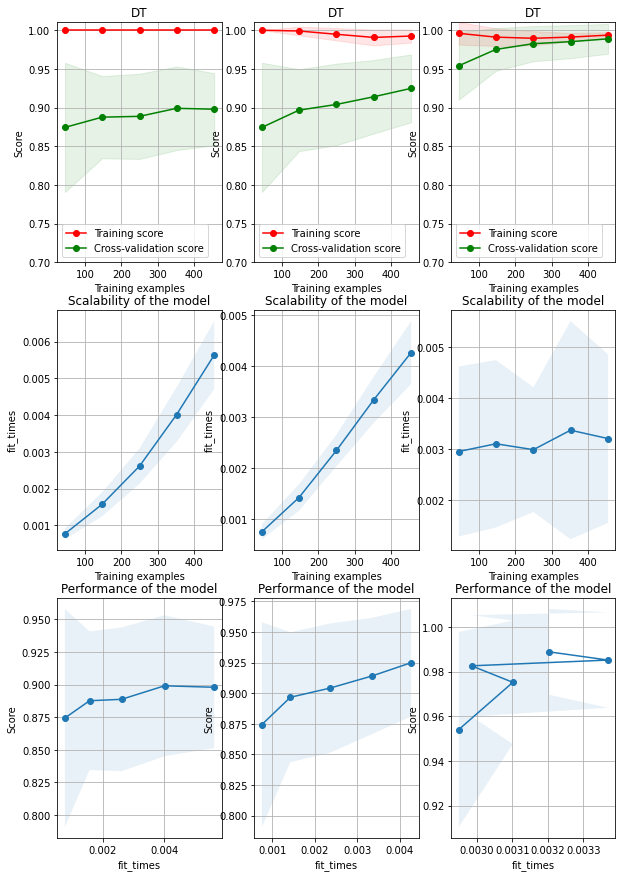

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(10, 15))

plot_learning_curve(dtc, "DT", X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4, scoring="precision")

plot_learning_curve(dtc_2, "DT", X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4, scoring="precision")


plot_learning_curve(rc, "DT", X, y, axes=axes[:, 2], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4, scoring="precision")

In [12]:
from sklearn.datasets import load_boston

In [13]:
the_data = load_boston()   

In [14]:
the_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
the_data["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
from sklearn.model_selection import train_test_split 
X = the_data["data"] 
y = the_data["target"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [17]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

In [18]:
rr = Ridge(random_state=42, )
dtr = DecisionTreeRegressor(random_state=42)

dtr_2 = DecisionTreeRegressor(random_state=42, max_depth=4)

https://www.sklearn.org/modules/model_evaluation.html

[ 0.00000000e+00 -4.33572406e-33 -3.41129040e-33 -2.41950949e-33
 -1.17157560e-33]
[-2.08919565 -6.15446561 -7.6973736  -8.64304928 -9.13776885]
[-12.70161967 -19.55019169 -20.99186646 -21.40378774 -21.88201257]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

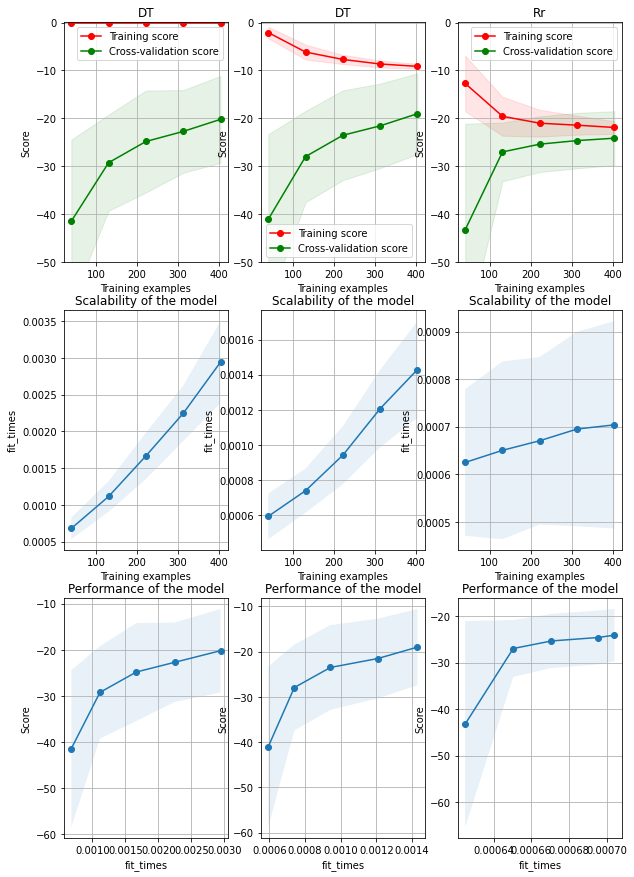

In [19]:



fig, axes = plt.subplots(3, 3, figsize=(10, 15))

plot_learning_curve(dtr, "DT", X, y, axes=axes[:, 0], ylim=(-50.0, 0.01),
                    cv=cv, n_jobs=4, scoring="neg_mean_squared_error")

plot_learning_curve(dtr_2, "DT", X, y, axes=axes[:, 1], ylim=(-50.0, 0.01),
                    cv=cv, n_jobs=4, scoring="neg_mean_squared_error")


plot_learning_curve(rr, "Rr", X, y, axes=axes[:, 2], ylim=(-50.0, 0.01),
                    cv=cv, n_jobs=4, scoring="neg_mean_squared_error")

In [21]:
from sklearn import tree

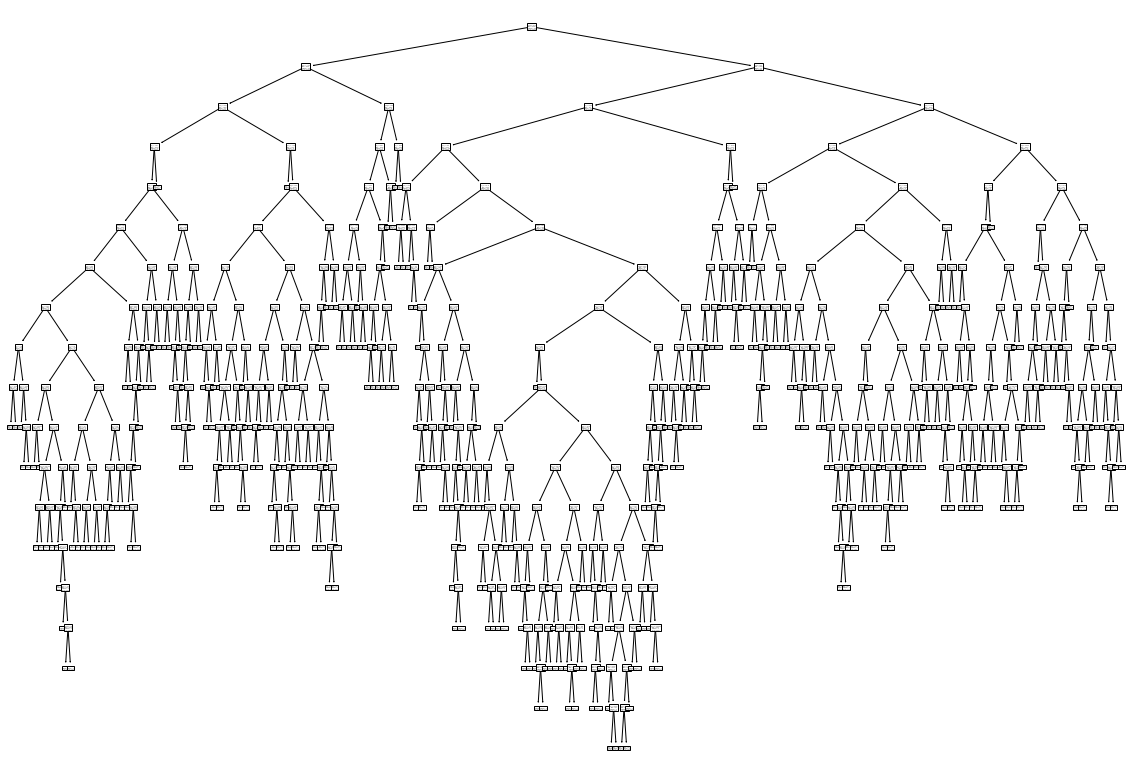

In [22]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
plt.figure(figsize=(20,14))
tree.plot_tree(dtr)
plt.show()

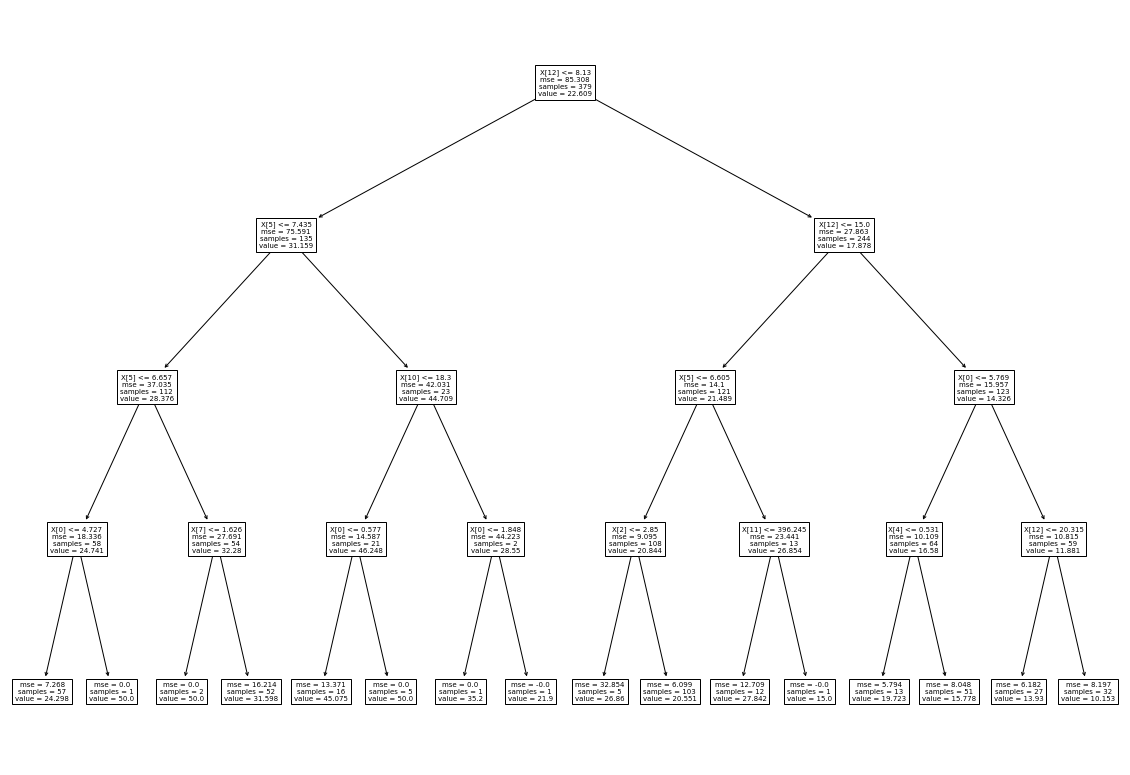

In [23]:
dtr_2 = DecisionTreeRegressor(random_state=42, max_depth=4)
dtr_2.fit(X_train, y_train)
plt.figure(figsize=(20,14))
tree.plot_tree(dtr_2)
plt.show()

In [24]:
import lightgbm as lgb

In [25]:
lgb_r = lgb.LGBMRegressor(n_estimators=1,learning_rate=1.0)

[ 0.00000000e+00 -4.33572406e-33 -3.41129040e-33 -2.41950949e-33
 -1.17157560e-33]
[-2.08919565 -6.15446561 -7.6973736  -8.64304928 -9.13776885]
[-67.53113525 -25.12753759 -20.16657844 -16.78654318 -15.48141767]
[-12.70161967 -19.55019169 -20.99186646 -21.40378774 -21.88201257]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

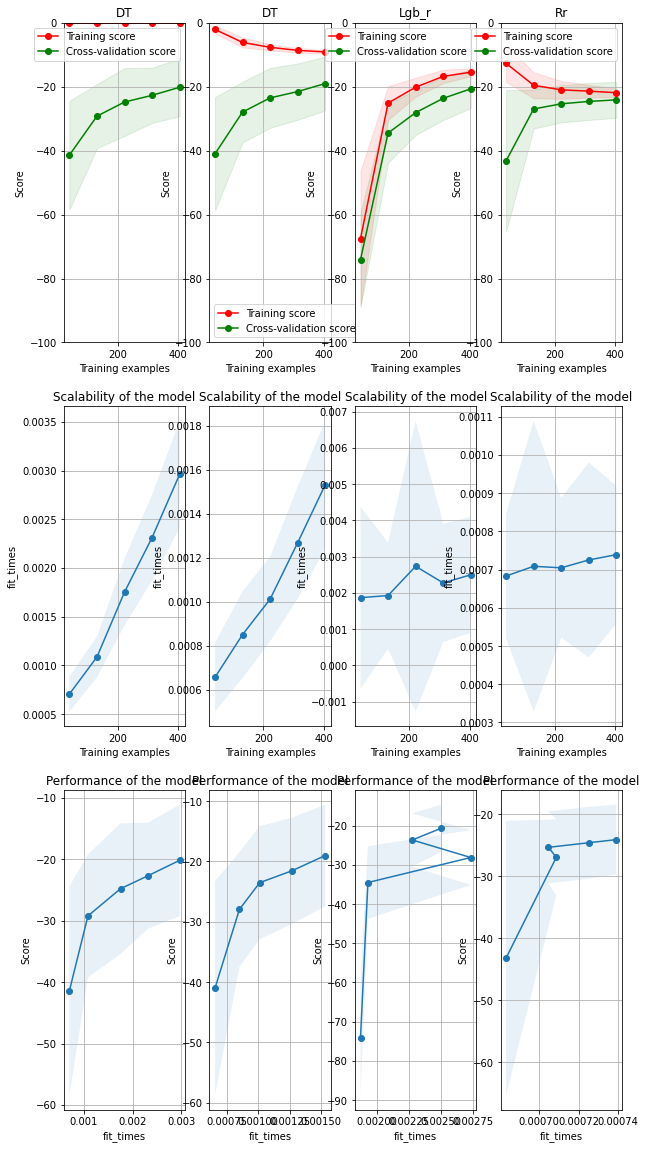

In [26]:



fig, axes = plt.subplots(3, 4, figsize=(10, 20))

plot_learning_curve(dtr, "DT", X, y, axes=axes[:, 0], ylim=(-100.0, 0.01),
                    cv=cv, n_jobs=4, scoring="neg_mean_squared_error")

plot_learning_curve(dtr_2, "DT", X, y, axes=axes[:, 1], ylim=(-100.0, 0.01),
                    cv=cv, n_jobs=4, scoring="neg_mean_squared_error")


plot_learning_curve(lgb_r, "Lgb_r", X, y, axes=axes[:, 2], ylim=(-100.0, 0.01),
                    cv=cv, n_jobs=4, scoring="neg_mean_squared_error")

plot_learning_curve(rr, "Rr", X, y, axes=axes[:, 3], ylim=(-100.0, 0.01),
                    cv=cv, n_jobs=4, scoring="neg_mean_squared_error")

In [27]:
lgb_r = lgb.LGBMRegressor(n_estimators=1,learning_rate=1.0)
lgb_r.fit(X_train, y_train)

LGBMRegressor(learning_rate=1.0, n_estimators=1)

In [28]:
print(lgb_r.booster_.model_to_string())

tree
version=v3
num_class=1
num_tree_per_iteration=1
label_index=0
max_feature_idx=12
objective=regression
feature_names=Column_0 Column_1 Column_2 Column_3 Column_4 Column_5 Column_6 Column_7 Column_8 Column_9 Column_10 Column_11 Column_12
feature_infos=[0.0063200000000000001:88.976200000000006] [0:100] [0.46000000000000002:27.739999999999998] [0:1] [0.38500000000000001:0.871] [3.5609999999999999:8.7799999999999994] [2.8999999999999999:100] [1.1741999999999999:12.1265] [1:24] [187:711] [12.6:22] [0.32000000000000001:396.89999999999998] [1.73:36.979999999999997]
tree_sizes=1297

Tree=0
num_leaves=15
num_cat=0
split_feature=12 5 12 5 12 0 2 12 5 12 6 5 11 12
split_gain=15286 5029.29 3106.51 1150.85 842.944 677.664 316.386 208.854 184.905 142.398 131.634 100.753 32.6099 25.4402
threshold=8.1800000000000015 7.0150000000000015 15.000000000000002 7.4620000000000006 5.2000000000000011 5.7114550000000008 4.8950000000000005 20.315000000000001 6.527000000000001 11.705000000000002 93.95000000000

### упражнение: непараллельность осей:
Dataset из demonstration_decision_tree "повернуть" и построить

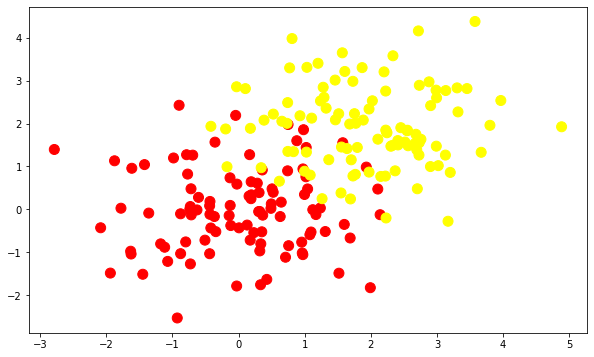

In [54]:
#first class
data_x = np.random.normal(size=(100, 2))
data_y = np.zeros(100)

#add second class
data_x = np.r_[data_x, np.random.normal(size=(100, 2), loc=2)]
data_y = np.r_[data_y, np.ones(100)]

plt.figure(figsize=(10.0, 6.0))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='autumn')

In [56]:
data_x.shape

(200, 2)

In [64]:
alpha = np.deg2rad(40) 
rot_m = np.array([
    [np.cos(alpha), -np.sin(alpha)],
    [np.sin(alpha), np.cos(alpha)]
                            ]   
                        )

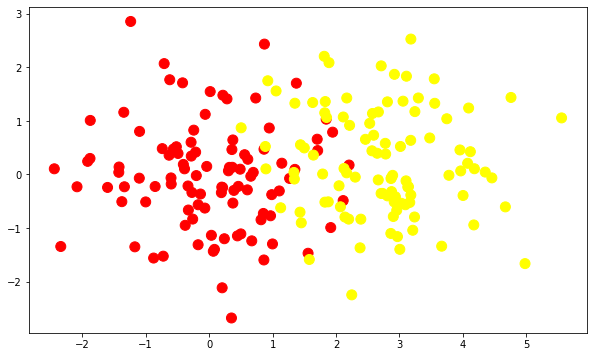

In [65]:
plt.figure(figsize=(10.0, 6.0))
plt.scatter(np.dot(data_x, rot_m)[:, 0], np.dot(data_x, rot_m)[:, 1], c=data_y, s=100, cmap='autumn')

### Замечания про деревья

не требовательны к предобработке признаков, но если разделяющая поверхность сложной формы, то будут ее реконструировать.
можно комбинировать: брать baseline от других моделей и доучивать деревом